### Recieving Fantasy Points Model

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

db_name = '../pythonsqlite.db'

conn = sqlite3.connect(db_name)


In [2]:
query = "select * from receiving_model_data"

df = pd.read_sql_query(query, con=conn)

In [4]:
df.head().T

,0,1,2,3,4
Name,Adam Humphries,Adam Humphries,Adam Humphries,Adam Humphries,Adam Humphries
Week,13.0,12.0,10.0,9.0,8.0
Team,TEN,TEN,TEN,TEN,TEN
Opp,@ IND,vs JAX,vs KC,@ CAR,vs TB
Score,W 31-17,W 42-20,W 35-32,L 20-30,W 27-23
rec_fantasy_pts,7.3,2,8.3,6.5,2.4
lag1_fantasy_pts,6.975,7.3,2,8.3,6.5
lag2_fantasy_pts,6.975,6.975,7.3,2,8.3
avg_pts_3weeks,6.975,7.3,4.65,5.866667,5.6
lag1_yds,51.0,13,20,23,65


In [5]:
target = ['rec_fantasy_pts']
lags = ['lag1_yds', 'lag2_yds', 'lag1_fantasy_pts',
        'lag2_fantasy_pts', 'lag1_tds', 'lag2_tds']
avgs = ['avg_tds_3weeks', 'avg_yds_3weeks', 'avg_pts_3weeks']
ratio = ['td_ratio', 'pts_ratio', 'yds_ratio']

df_noNull = df.replace(np.inf, 0)
df_noNull = df_noNull.fillna(0)
df_noNull[target+lags+avgs+ratio] = df_noNull[target +
                                              lags+avgs+ratio].astype(float)


In [6]:
inputs = avgs + ratio + lags + target + ['Week'] + ['Name']

model_data = df_noNull[inputs]
model_data.loc[model_data.rec_fantasy_pts < 0, 'rec_fantasy_pts'] = 0

model_data.head().T

,0,1,2,3,4
avg_tds_3weeks,0.3125,1.0,0.5,0.666667,0.333333
avg_yds_3weeks,51.0,13.0,16.5,18.666667,36.0
avg_pts_3weeks,6.975,7.3,4.65,5.866667,5.6
td_ratio,1.0,1.0,0.0,1.5,0.0
pts_ratio,1.0,1.0,0.430108,1.414773,1.160714
yds_ratio,1.0,1.0,1.212121,1.232143,1.805556
lag1_yds,51.0,13.0,20.0,23.0,65.0
lag2_yds,51.0,51.0,13.0,20.0,23.0
lag1_fantasy_pts,6.975,7.3,2.0,8.3,6.5
lag2_fantasy_pts,6.975,6.975,7.3,2.0,8.3


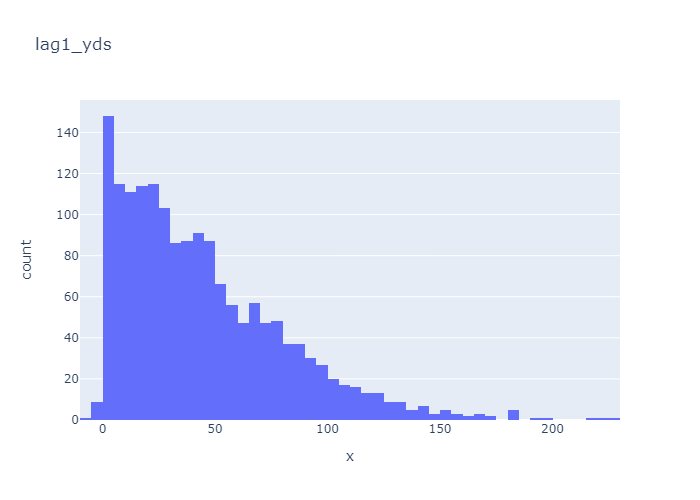

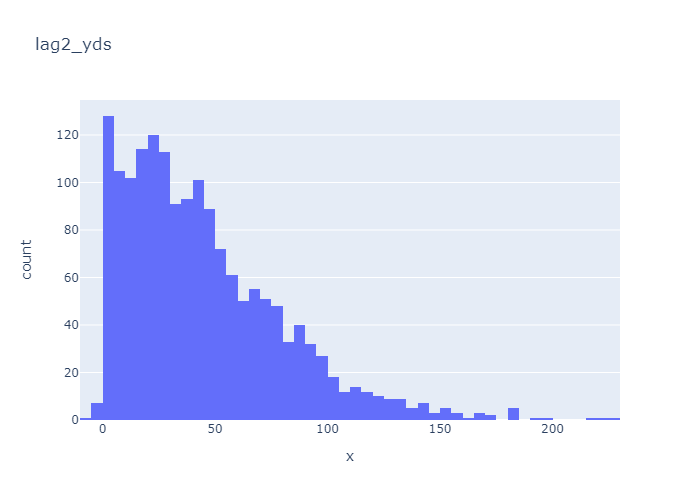

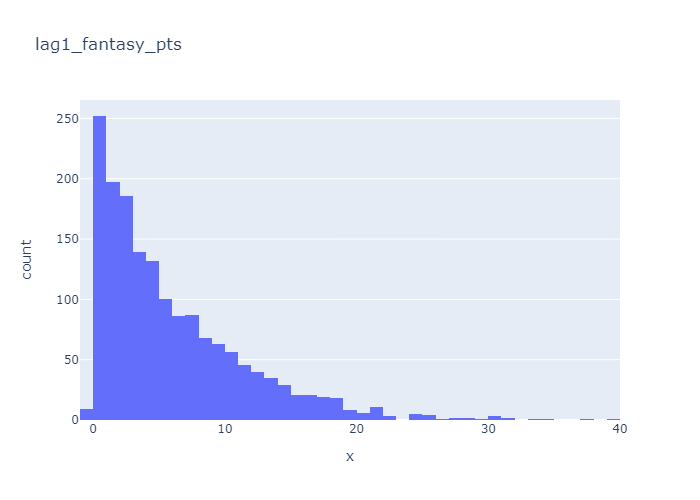

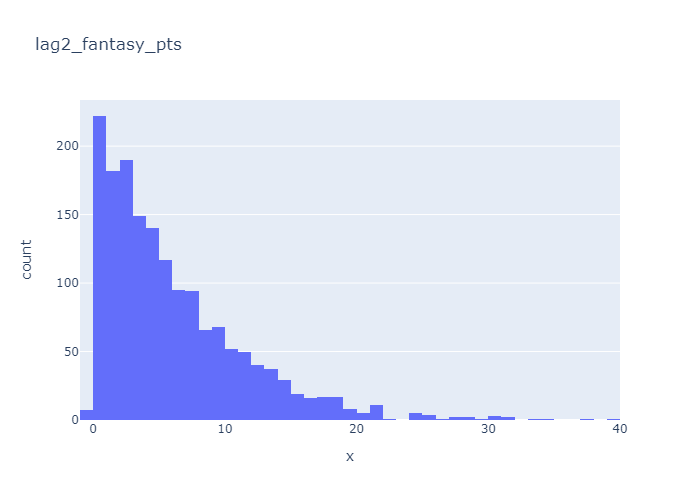

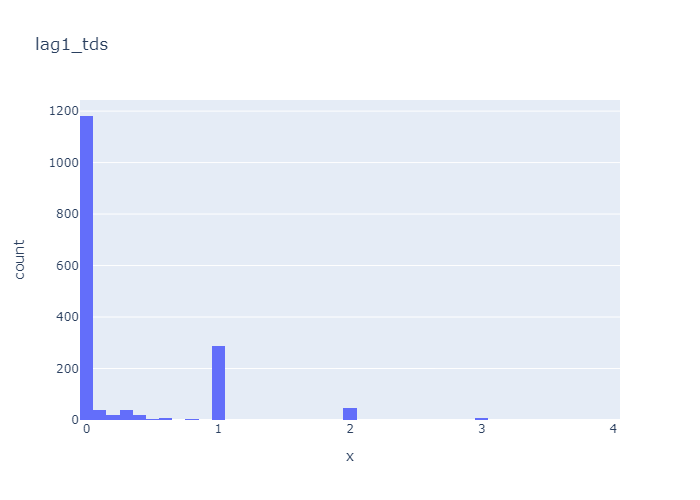

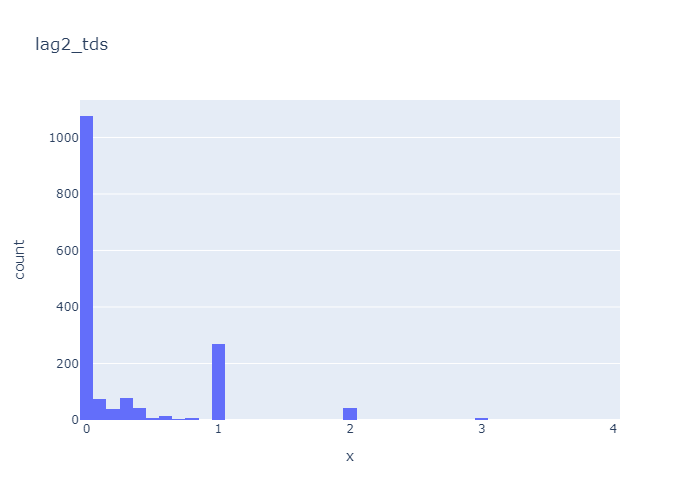

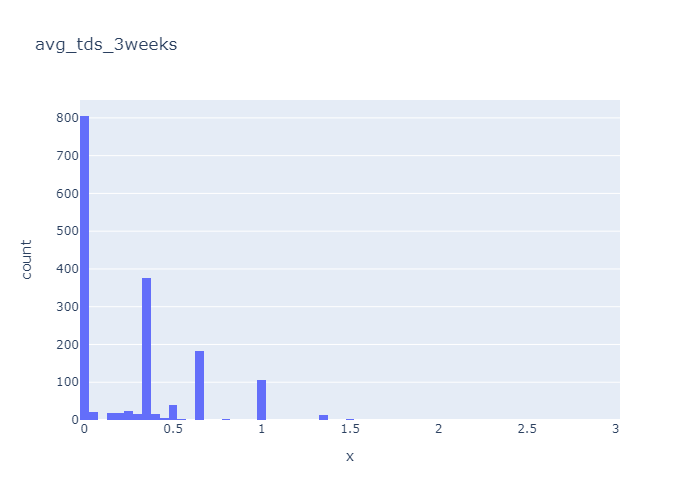

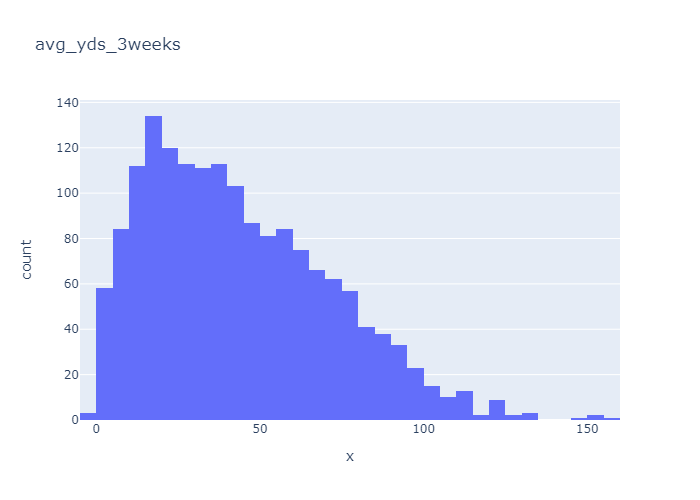

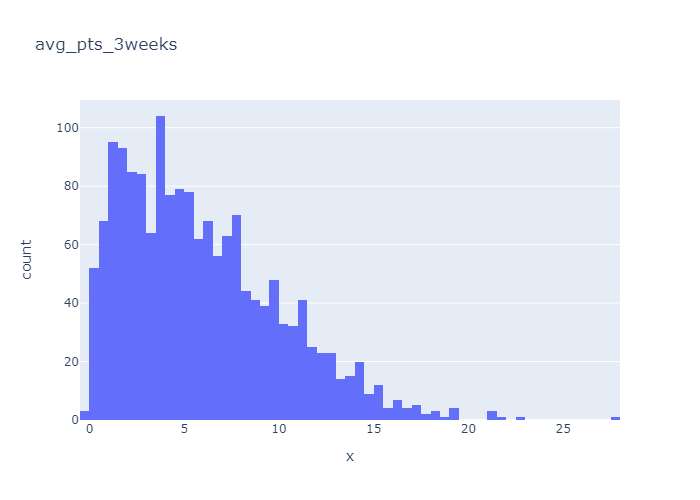

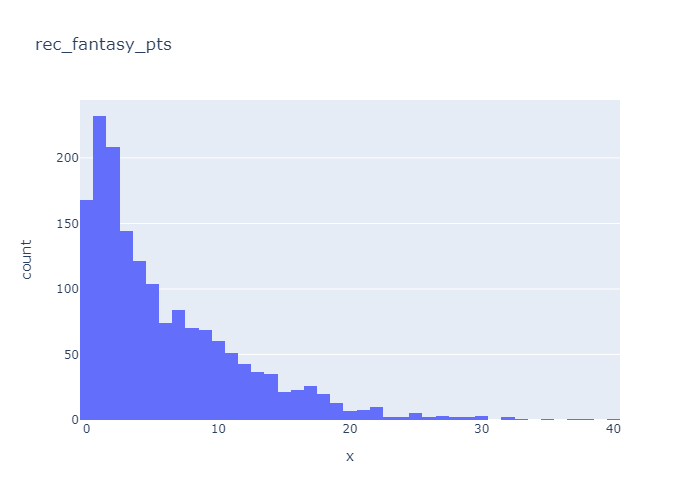

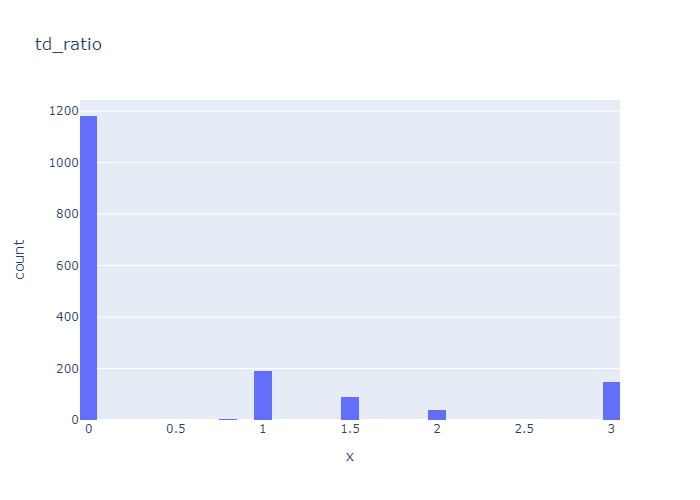

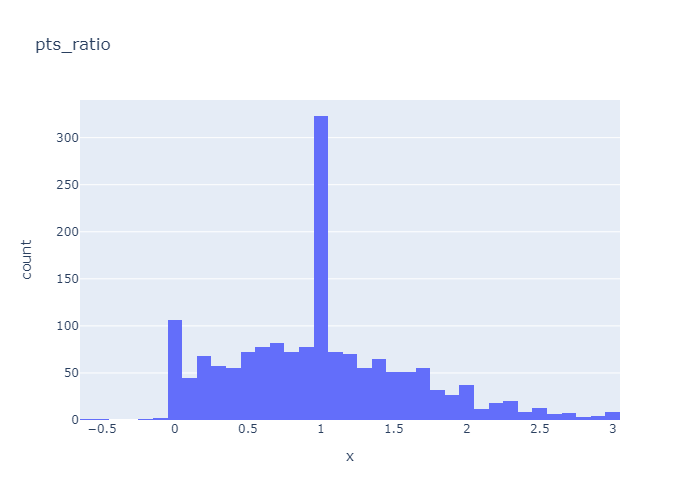

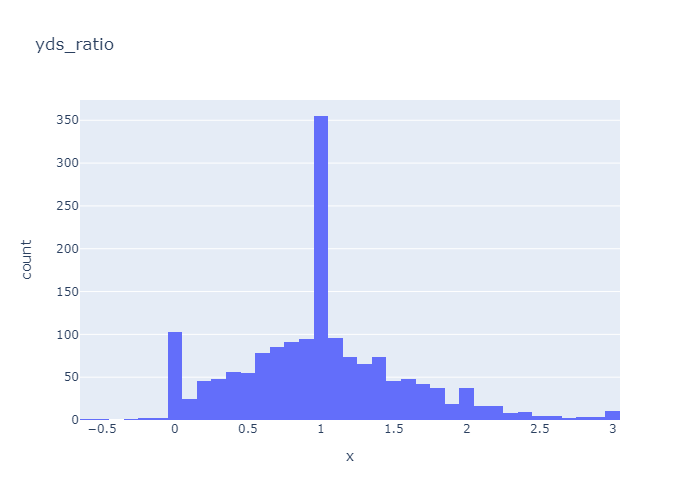

In [7]:
for i in lags+avgs+target+ratio:
    px.histogram(
        x=model_data.loc[:, i],
        title=i
    ).show(renderer='png')

In [10]:
# creating some log features

for i in ['lag1_yds', 'lag2_yds', 'lag1_fantasy_pts', 'lag2_fantasy_pts'] + avgs:
    col = 'log1p_' + i
    model_data.loc[model_data[i] < 0, i] = 0
    model_data.loc[:, col] = np.log1p(model_data.loc[:, i])


In [11]:
model_data.head().T

,0,1,2,3,4
avg_tds_3weeks,0.3125,1.0,0.5,0.666667,0.333333
avg_yds_3weeks,51.0,13.0,16.5,18.666667,36.0
avg_pts_3weeks,6.975,7.3,4.65,5.866667,5.6
td_ratio,1.0,1.0,0.0,1.5,0.0
pts_ratio,1.0,1.0,0.430108,1.414773,1.160714
yds_ratio,1.0,1.0,1.212121,1.232143,1.805556
lag1_yds,51.0,13.0,20.0,23.0,65.0
lag2_yds,51.0,51.0,13.0,20.0,23.0
lag1_fantasy_pts,6.975,7.3,2.0,8.3,6.5
lag2_fantasy_pts,6.975,6.975,7.3,2.0,8.3


### Fitting Elastic Net Model

In [8]:
# importing statsmodels packages
import statsmodels.api as sm

In [12]:
# fit a regularized regression model

model_cols = [
    'log1p_lag1_yds', 'log1p_lag2_yds', 'log1p_lag1_fantasy_pts',
    'log1p_lag2_fantasy_pts', 'log1p_avg_tds_3weeks',
    'log1p_avg_yds_3weeks', 'log1p_avg_pts_3weeks',
    'td_ratio', 'yds_ratio', 'pts_ratio', 'lag1_tds', 'lag2_tds']

# model_data[model_cols] = model_data[model_cols].replace(
#     np.inf, np.nan).replace(-np.inf, np.nan).fillna(0)

pens = [.001, .01, .1, .25, .5, 1, 10]

for i in pens:
    j = 0
    rmse_score = []
    mae_score = []
    while j < 10:

        # split the data into train/test
        y_train, y_test, x_train, x_test = train_test_split(
            np.log1p(model_data['rec_fantasy_pts']), model_data[model_cols], test_size=.25)

        elastic_net = sm.OLS(endog=y_train, exog=sm.add_constant(x_train)).fit_regularized(
            method='elastic_net',
            L1_wt=.5,
            alpha=i
        )

        net_preds = elastic_net.predict(sm.add_constant(x_test))
        rmse = np.sqrt(
            np.sum((y_test - net_preds)**2)/len(y_test))
        mae = np.mean(np.abs(y_test - net_preds))

        j += 1
        rmse_score.append(rmse)
        mae_score.append(mae)

    agg_rmse = np.mean(rmse_score)
    agg_mae = np.mean(mae_score)

    print(
        f"""RMSE: {agg_rmse}, MAE: {agg_mae} with pentalty {i}"""
    )


RMSE: 0.8057772673691975, MAE: 0.6525612608649247 with pentalty 0.001
RMSE: 0.81497363128743, MAE: 0.6587452879933741 with pentalty 0.01
RMSE: 0.8088535551851435, MAE: 0.6546394909991032 with pentalty 0.1
RMSE: 0.839616009531752, MAE: 0.6851317068423766 with pentalty 0.25
RMSE: 0.8418538703489725, MAE: 0.6880946954104502 with pentalty 0.5
RMSE: 0.8193442438988356, MAE: 0.6736865117023613 with pentalty 1
RMSE: 1.6542642379238868, MAE: 1.4285735314706058 with pentalty 10


In [13]:
final_model = sm.OLS(endog=np.log1p(model_data['rec_fantasy_pts']),
                     exog=sm.add_constant(model_data[model_cols])).fit_regularized(
    method='elastic_net',
    L1_wt=.5,
    alpha=0.001
)


In [14]:
dict(final_model.params)

{'const': 0.7150250155755331,
 'log1p_lag1_yds': 0.17768110250717967,
 'log1p_lag2_yds': -0.0010537013303890965,
 'log1p_lag1_fantasy_pts': 0.18620365316304266,
 'log1p_lag2_fantasy_pts': 0.054606415860543996,
 'log1p_avg_tds_3weeks': -0.21021042709558402,
 'log1p_avg_yds_3weeks': -0.006819962604724016,
 'log1p_avg_pts_3weeks': 0.19238655807201274,
 'td_ratio': -0.07521850237932394,
 'yds_ratio': -0.3288350961110574,
 'pts_ratio': 0.0,
 'lag1_tds': 0.0,
 'lag2_tds': 0.0}

In [21]:
resid = model_data['rec_fantasy_pts'] - np.exp(final_model.fittedvalues - 1)

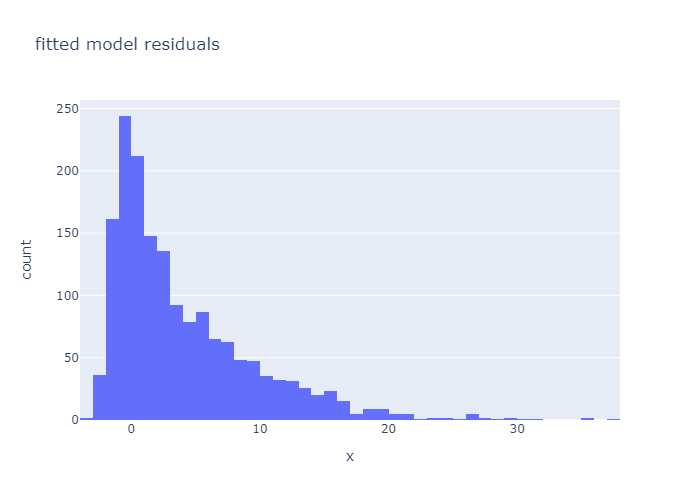

In [22]:
px.histogram(
    x=resid,
    title='fitted model residuals'
).show(renderer='png')

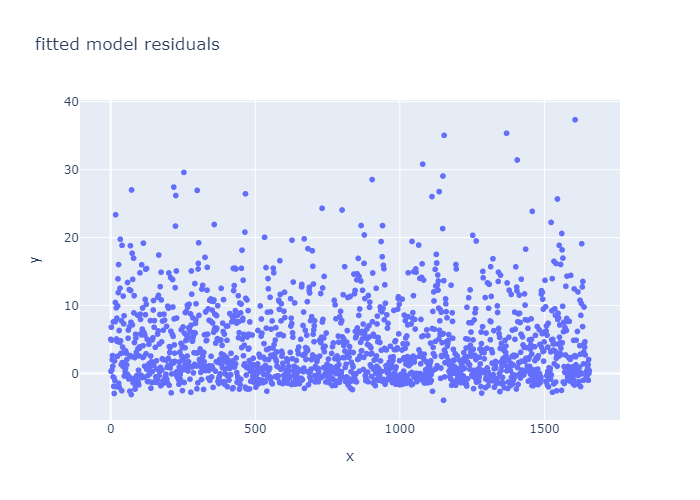

In [23]:
px.scatter(
    y=resid,
    title='fitted model residuals'
).show(renderer='png')

In [24]:
import json 

json.dump(dict(final_model.params), open('rec_model_params.json', 'w'))